# Diabetes Dataset Analysis

## 1. Cover Page
- Student Number: 100683187
- Course Name: 6CC555 Data Mining and AI

## 2. Introduction
- Selected CSV File: [Healthcare-Diabetes.csv]
- Analysis Problem : Risk Factor Analysis for Diabetes Development
- Definition : 
    The analysis problem for this project is to identify the most important risk factors on the development of diabetes.
- Question : 
    What are the biggest risk factors associated with the development of diabetes, and what role do the play in a diabetes diagnosis?
- Target Variable: The target variable for this analysis is the Outcome column in the dataset, which indicates whether a patient has diabetes (1) or not (0).
- Features:
1. Age: Age of the patient.
2. BMI: Body Mass Index.
3. Blood Pressure: Blood pressure levels of the patient.
4. Glucose Level: Glucose concentration(in the blood).
5. Insulin Level: Insulin concentration(in the blood).
6. Skin Thickness: Thickness of the skin fold at the triceps.
7. Diabetes Pedigree Function: The likelihood of diabetes based on family history.
8. Pregnancies: Number of times the patient has been pregnant (female patients).

## 3. Exploratory Data Analysis (EDA)
- Importing Libraries (Done)
- Loading the Dataset (Done)
- Understanding the Data Structure (Done)
- Summary Statistics (Done)
- Data Cleaning (Done)
- Data Visualization: (Done)
  - Distribution of Target Variable
  - Correlation Analysis
  - Feature Distributions
  - Outlier Detection (if applicable)
  
- Insights and Discoveries:  

  - Class imbalance in the distribution of the Outcome variable because of more negative diabetes occurances. 

  - Slightly positive interaction between Glucose and the target variable. That means Glucose levels have an impact on the chances of a diabetes diagnosis.

  - Higher probability of diagnosis when the Body Mass Index is higher(depending on the target variable).
 
  - Histograms show the distribution of singular features in the dataset through visualization.

  - Glucose, Body Mass Index, and Age values spike towards the right side of the distribution.

  - The distribution of Blood Pressure seems to be centered around a mean value.

  - Lower values in Insulin and Skin Thickness distributions, there may be some outliers or missing values.

  - Box plots may identify outliers.
 
  - There are missing values in some features, Insulin and Skin Thickness for example.

  - The outliers and missing values mentioned above should be taken into account when pre-processing for better performance.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Healthcare-Diabetes.csv")

# Display the first few rows of the dataset
print(data.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# Check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)

# Get information about the dataset (data types, non-null counts)
print(data.info())

Shape of the dataset: (2768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


In [3]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


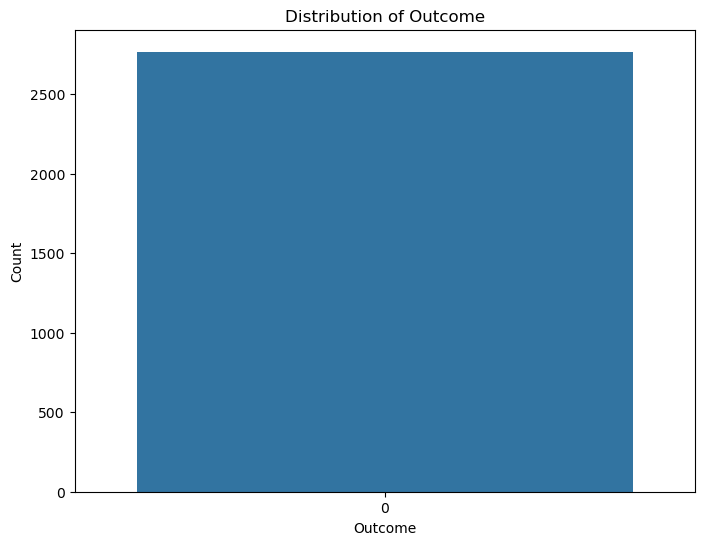

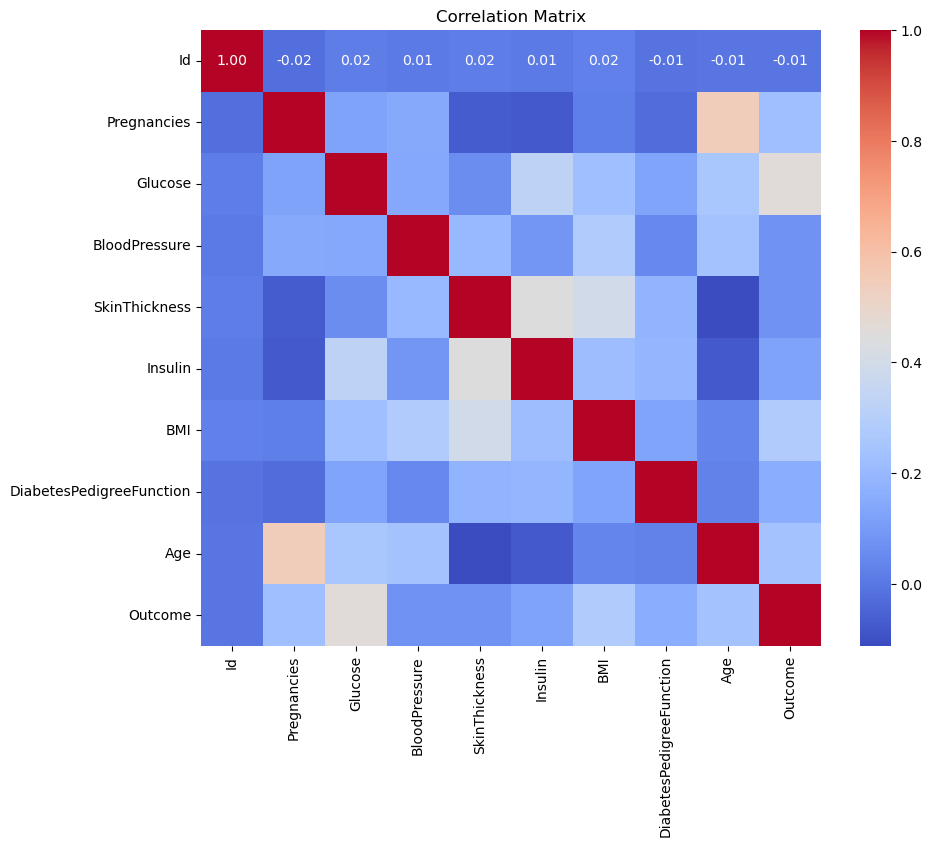

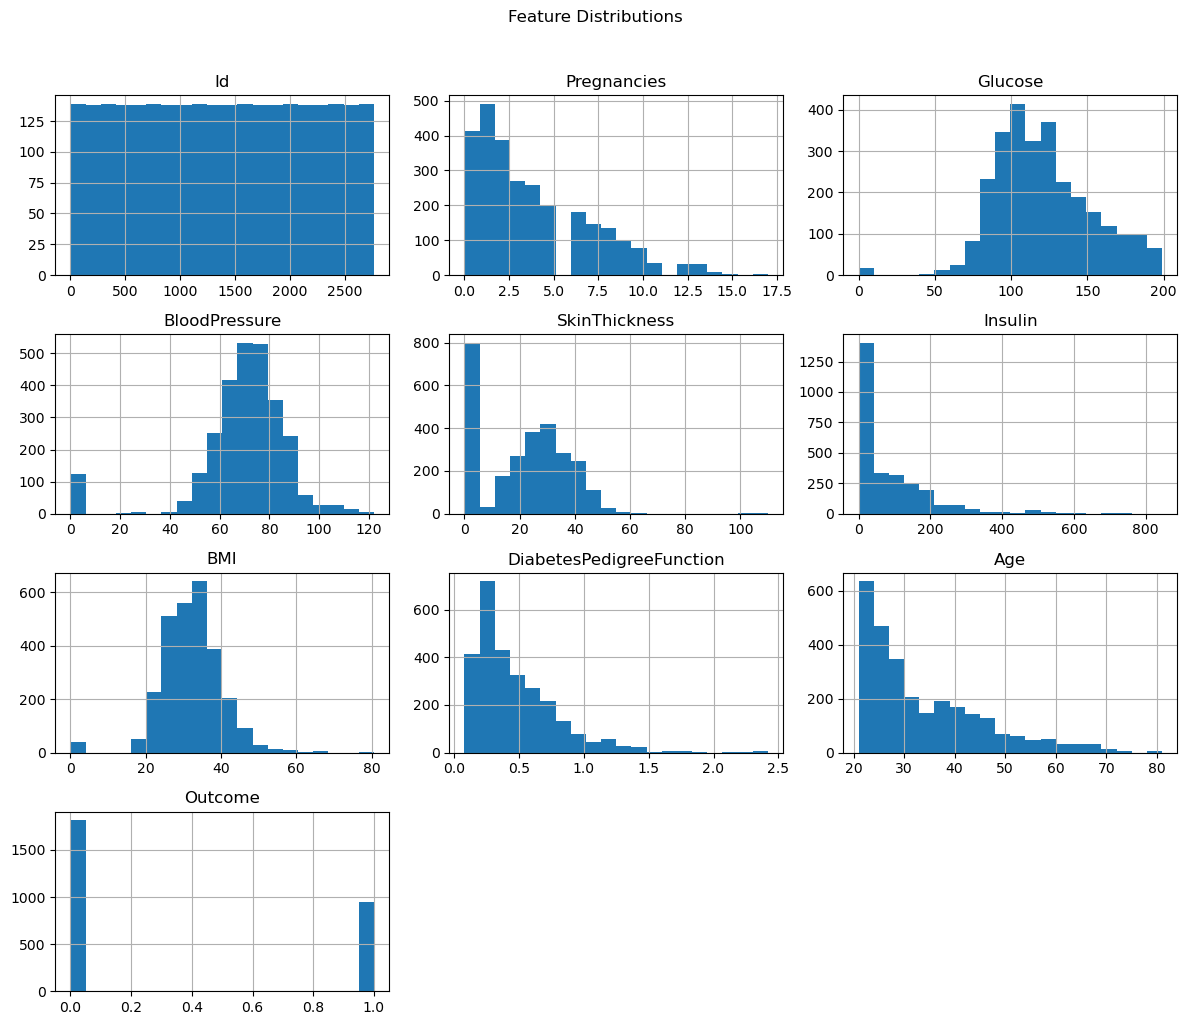

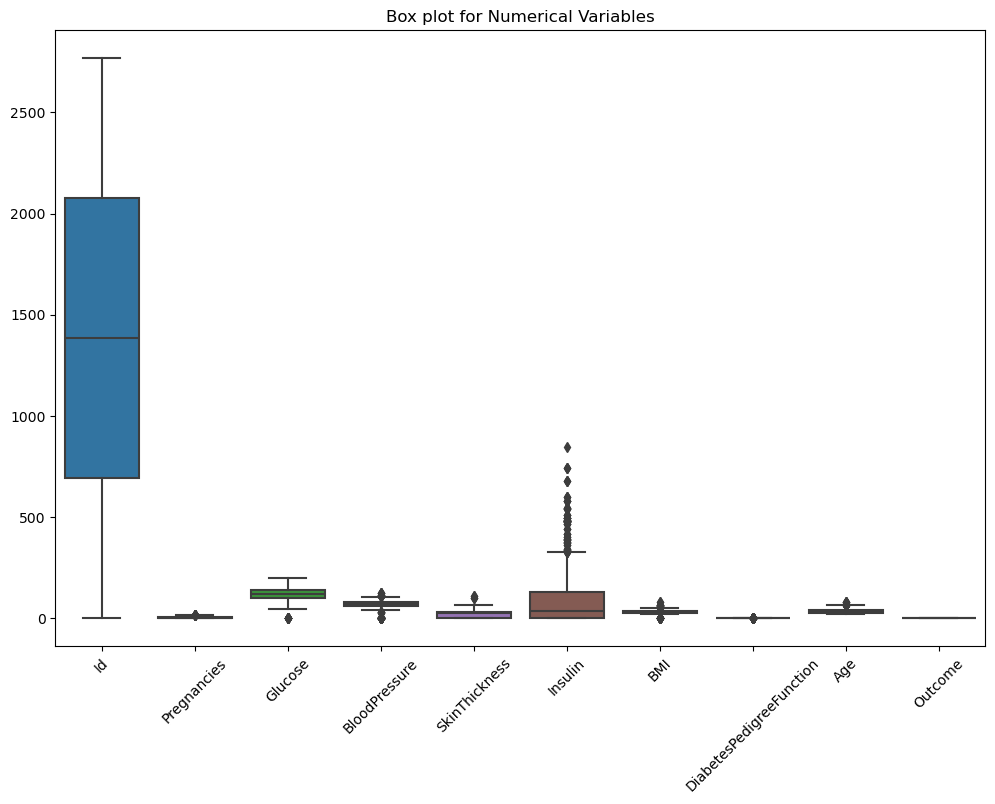

In [4]:
# Distribution of the target variable ('Outcome')
plt.figure(figsize=(8, 6))
sns.countplot(data['Outcome'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature distributions
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

# Outlier detection
# Example: Box plot for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Box plot for Numerical Variables')
plt.xticks(rotation=45)
plt.show()

## 4. Algorithm Implementation
- Preprocessing:
  - Data Splitting (Training and Testing) (Done)
  - Feature Scaling (if applicable) (Done)
- Model Selection:
  - Brief Overview of Algorithms Considered : 

  1.Logistic Regression (LR).

  2.Decision Trees (DT).

  3.Random Forest (RF).

  4.Support Vector Machines (SVM).

  - Chosen Algorithm Explanation :
  
  I used the Random Forest (RF) algorithm because of its ability to capture complex non-linear relationships in the data, which I consider beneficial for diabetes prediction. Random Forest is  an ensemble learning method that combines the predictions of multiple decision trees to reach a conclusion(a single tree), this ensemble approach aids in generalization performance improvement and overfitting reduction. Random Forest is also less sensitive to noisy data and outliers compared to the other algorithms I considered.(1*)
  
- Algorithm Implementation:
  - Code for Model Training (Done)
  - Code for Model Evaluation (Done)
- Model Tuning (if applicable)
- Insights and Explanations:
  - the code is explained with comments

In [5]:
#a library in Python that provides many unsupervised and supervised learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = rf_classifier.predict(X_test_scaled)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[365   2]
 [  7 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.98       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554


Accuracy Score: 0.983754512635379


## 5. Evaluations and Comparisons
-- Evaluation Metrics Used :
  This code will calculate the accuracy, confusion matrix, classification report (including precision, recall, and F1-score), and ROC-AUC score for the Random Forest Classifier. These metrics will show us how well the model performs in diabetes preditcion.

  
-- Model Performance:
  - Performance of the Chosen Algorithm : Overall, the Random Forest Classifier shows strong performance in diabetes prediction based on the evaluation metrics we obtained.
    
- Interpretation of Results :

1. Accuracy :

 - The accuracy metric shows the proportion of correctly classified instances out of all the instances. Higher accuracy means better performance of the model.

2. Confusion Matrix:

 - The Confusion Matrix consist of these metrics : True positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). They help us understand the model's performance by how correct or incorrect it classifies instances. It gives an analysis of the model's predictions compared to the actual labels.

3. Classification Report:

 - The classification report provides precision, recall, F1-score, and support for each class (0 means negative diagnosis and 1 means positive diagnosis).

 - Precision indicates the proportion of true positive predictions out of all positive predictions made by the model.

 - Recall indicates the proportion of true positive predictions out of all actual positive instances in the data.

 - F1-score is the harmonic mean of precision and recall, it provides a measure of the model's performance.

 - Support indicates the number of occurrences of each class in the test data.

4. ROC-AUC Score:

 - The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score measures the area under the ROC curve, which puts the true positive rate against the false positive rate at various threshold settings.

 - A higher ROC-AUC score means better discrimination between positive and negative classes.(2*)



-- Limitations and Challenges Encountered :

1. Limited or noisy data: The dataset may contain missing values, outliers, or inaccuracies, which may impact the model's performance. The model's performance 

2. Class imbalance: The dataset may have an unequal distribution of classes, which could affect the model's performance and bias the predictions

3. Feature Selection: 

 - Limited features : The dataset lacks important features for diabetes outcomes, that limits the model's predictive capabilities.
 - Feature engineering challenges: Making informative features or selecting the most relevant features for the model can present challenges.

4.  Model Complexity:

 - Overfitting: Random Forest models are prone to overfitting, especially when the number of trees or maximum depth is not properly tuned.
 - Interpretability: While Random Forest models provide high predictive accuracy, they may lack interpretability compared to simpler models like logistic regression.

5. Evaluation Metrics: Choice of evaluation metrics: The choice of evaluation metrics for example precision and recall, may not fully grasp the model's performance, especially in cases of imbalanced classes.

6. Computational Resources: Training Random Forest models is expensive, especially when it comes to larger datasets.

-- Conclusion : Addressing these limitations and challenges is crucial for ensuring the reliability and validity of the analysis results.
Strategies such as data preprocessing, feature engineering, model regularization, and careful selection of evaluation metrics can help mitigate these limitations and improve the analysis.
Additionally, it's important to consider the implications when making decisions based on the model's predictions.

-- Possible Future Improvements : It's essential to iteratively refine and optimize the analysis pipeline based on feedback from domain experts, stakeholders, and real-world observations. By incorporating advanced techniques, leveraging diverse data sources, and staying abreast of recent developments in machine learning and healthcare, we can continuously improve the effectiveness of diabetes prediction models and contribute to better healthcare outcomes.



In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Evaluate model performance
print("Evaluation Metrics for Random Forest Classifier:")
print("--------------------------------------------------")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])
print("\nROC-AUC Score:", roc_auc)

Evaluation Metrics for Random Forest Classifier:
--------------------------------------------------
Accuracy: 0.983754512635379

Confusion Matrix:
[[365   2]
 [  7 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.98       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554


ROC-AUC Score: 0.9842049279459121


## 6. Conclusion
- Summary of Key Findings

High Accuracy and Performance: The Random Forest Classifier achieved an accuracy of approximately 98.38% on the test dataset, indicating its ability to accurately predict diabetes outcomes. The model exhibited high precision for both classes (diabetes and no diabetes), showcasing its effectiveness.

Discrimination Ability: The ROC-AUC score of approximately 0.984 showcased the model's great discrimination ability between positive and negative classes.

Limited False Positives and Negatives: The confusion matrix showcased that the model made almost no errors, with only a very small number of false positives or negatives.

Potential for Early Detection and Prevention: The Random Forest Classifier highlighted its potential for early detection and prevention of diabetes. With the accurate identification of individuals at risk of diabetes, healthcare professionals can implement timely interventions.

Future Directions for Improvement: While the Random Forest Classifier showed great results, there is room for improvement through feature engineering, model optimization, and integration of additional data sources.


- Concluding Remarks

The analysis gave us great insights into the potential of machine learning in the Healthcare Industry. The model showed its effectiveness with high accuracy, great discrimination ability and a only small number of False Positives.

Collaboration with healthcare professional will be essential for the validation of the model's predictions in the future.

The ultimate goal is to aid healthcare providers with accuracy and reliability in tools for identification of individuals at risk of diabetes, to intervene in time for mitigation of the disease's impact on the patient. Millions of patients worldiwide can benefit if we take advantage of the power of data-driven approaches to address the growing challenge of diabetes.

## References

In [ ]:
1*. https://www.ibm.com/topics/random-forest
2*. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5